In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
fname = 'results/20160825-143207-156.txt'
date = fname.split('/')[1].split('.')[0]
print date
data = np.loadtxt(fname)

20160825-143207-156


In [49]:
data.shape

(65, 3)

In [50]:
pix_dist = data[: , 0].ravel()
altitude = data[: , 1].ravel()
alt_err = data[: , 2].ravel()

In [51]:
# Throw away lowest and highest 10 %
offset = int(0.1 * data.shape[0])

In [52]:
print data.shape[0]
idx_arr = altitude.argsort(axis=0)[offset : -offset]
print idx_arr.shape[0]

65
53


In [53]:
pix_dist = pix_dist[idx_arr]
altitude = altitude[idx_arr]
alt_err = alt_err[idx_arr]

In [57]:
h_laser = 1000

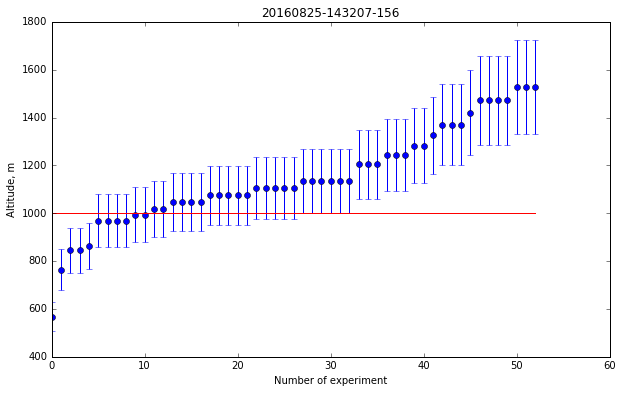

In [62]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(altitude.shape[0]), altitude, yerr=alt_err, marker='o', linestyle='None')
plt.title(date)
plt.xlabel('Number of experiment')
plt.ylabel('Altitude, m')
plt.plot(range(altitude.shape[0]), h_laser * np.ones_like(altitude), 'r', label='Laser')
plt.savefig('results/' +'plot_' + date + '_' + str(altitude.shape[0]) + '.png')